In [1]:
import sys

sys.path.append("..")

([], [])

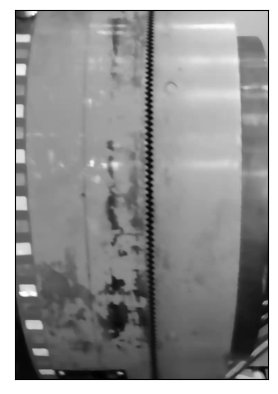

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from utiltis import read_img

img = cv2.imread('../pics/test3_r.jpg', 0)
# img = cv2.imread('../pics/test4_r.jpg', 0)
# img = cv2.imread('../pics/test5c_r.jpg', 0)
plt.imshow(img, cmap='gray')
plt.xticks([]); plt.yticks([])

# Get derivates


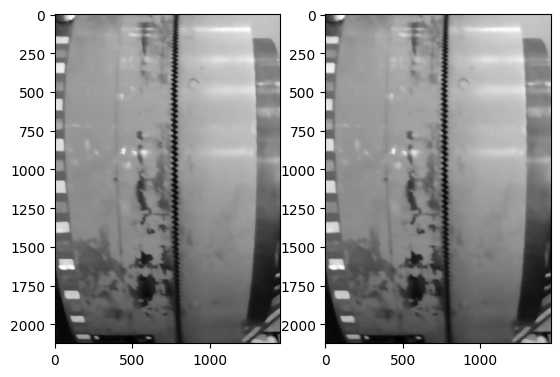

In [3]:
blurred = cv2.GaussianBlur(img, (9, 9), 3)

_, axs = plt.subplots(1, 2)

axs[0].imshow(img, cmap='gray')
axs[1].imshow(blurred, cmap='gray')

(<Figure size 640x480 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

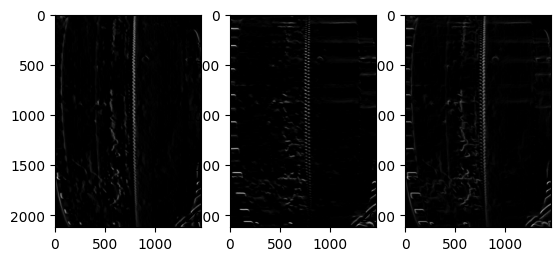

In [4]:
# cv2.Sobel(src, ddepth, dx, dy, ksize, scale)
from utiltis import many_plot
from derivates import ImgDerivates

dproc = ImgDerivates(blurred)
sobelx = dproc(direction='x')
sobely = dproc(direction='y')
sobel_grad = dproc()

# ddepth = cv2.CV_16S
# sobelx = cv2.Sobel(blurred, -1, 1, 0)
# sobely = cv2.Sobel(blurred, -1, 0, 1)
# sobelxy = cv2.Sobel(blurred, -1, 1, 1)
# sobel_grad = cv2.addWeighted(sobelx, .5, sobely, .5, 0)

# many_plot((1, 4), (sobelx, sobely, sobelxy, sobel_grad), cmap='gray')
many_plot((1, 3), (sobelx, sobely, sobel_grad), cmap='gray')

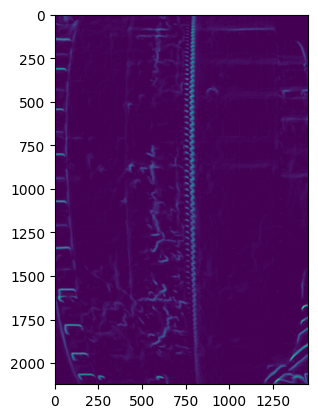

In [5]:
# cv2.Sobel(src, ddepth, dx, dy, ksize, scale)
from utiltis import many_plot

ddepth = cv2.CV_16S
scharrx = cv2.Scharr(blurred, -1, 1, 0)
scharry = cv2.Scharr(blurred, -1, 0, 1)
# scharrxy = cv2.Scharr(blurred, -1, 1, 1)
scharr_grad = cv2.addWeighted(sobelx, .5, sobely, .5, 0)

# many_plot((1, 4), (sobelx, sobely, sobelxy, sobel_grad), cmap='gray')
plt.imshow(scharr_grad)

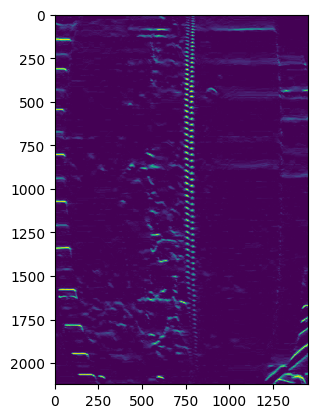

In [6]:
from derivates import get_derivates

plt.imshow(get_derivates(img, method='scharr', direction='y'))

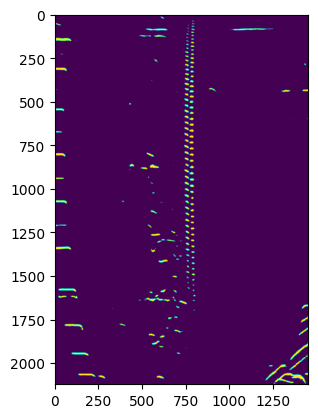

In [8]:
ImgDerivates
from thr_binary import OTUSBinary

binproc = OTUSBinary()

dproc = ImgDerivates(blurred)
dproc.regist_bin_proc(binproc)

sobely_bin = dproc(direction='y')
plt.imshow(sobely_bin[1])

(<Figure size 640x480 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

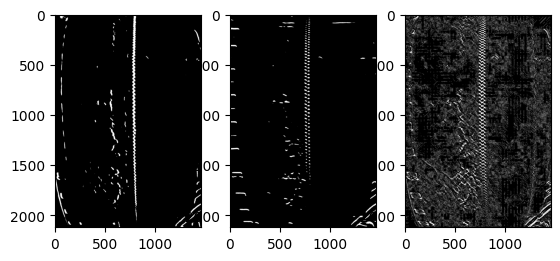

In [33]:
from thr_binary import OTUSBinary

proc = OTUSBinary()

sobel_imgs = []
for im in (sobelx, sobely, sobelxy):
    proc.load_img(im)
    sobel_imgs.append(proc()) 

sobel_imgs = [im for _, im in sobel_imgs]

many_plot((1, 3), sobel_imgs, cmap='gray')

In [36]:
np.all((sobel_imgs[2]==0) | (sobel_imgs[2]==255))

True

In [40]:
np.sum(sobel_imgs[2]==255), np.sum(sobel_imgs[2]==0), sobel_imgs[2].size

(436371, 2651139, 3087510)

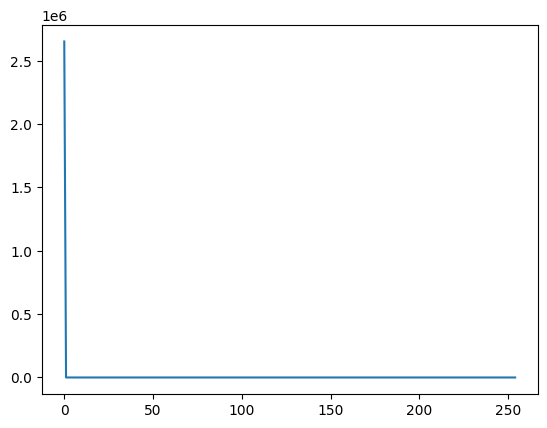

In [37]:
hist = cv2.calcHist([sobel_imgs[2]], [0], None, [255], [0, 255])
plt.plot(hist)